<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Exploration/%5BE-03%5D%EA%B3%A0%EC%96%91%EC%9D%B4%EC%88%98%EC%97%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EB%B6%99%EC%9D%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

--2021-07-27 11:49:45--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  43.5MB/s    in 1.4s    

2021-07-27 11:49:47 (43.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



## 이미지1) 정면사진

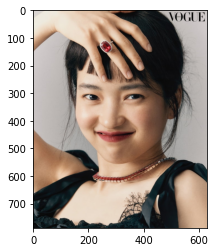

In [ ]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image2.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

dlib의 face_detector로 얼굴 영역 찾기

rectangles[[(139, 213) (472, 546)]]


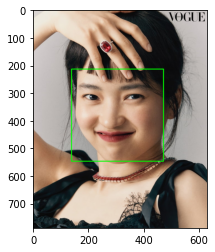

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

얼굴 landmark 68개 좌표 구하기

In [ ]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(155, 304), (155, 343), (157, 381), (164, 418), (178, 455), (202, 487), (229, 517), (255, 544), (289, 555), (330, 553), (374, 536), (415, 512), (451, 480), (473, 440), (482, 395), (487, 350), (488, 306), (161, 281), (176, 266), (201, 265), (226, 271), (251, 282), (306, 284), (337, 271), (370, 266), (405, 268), (435, 286), (280, 316), (279, 348), (277, 380), (275, 412), (248, 415), (263, 424), (281, 431), (300, 424), (319, 417), (187, 313), (204, 307), (224, 308), (243, 323), (222, 325), (201, 322), (333, 322), (353, 309), (374, 307), (396, 314), (376, 322), (354, 323), (224, 439), (244, 439), (265, 439), (284, 444), (304, 440), (333, 441), (367, 442), (335, 467), (305, 477), (284, 479), (264, 476), (244, 462), (233, 443), (265, 450), (285, 454), (305, 452), (358, 445), (305, 460), (284, 462), (264, 458)]


landmark를 cv2.circle()을 통해 노란점으로 표시해보자.

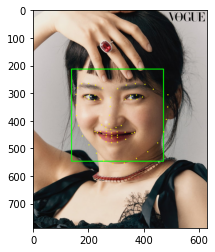

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68개의 landmark를 사용할 때 참고할 이미지이다.

![이미지](https://drive.google.com/uc?export=view&id=1jcObDacLjSXr2T3LLXTU3jvzYu10jw2R)

landmark좌표를 사용해서 스티커를 붙일 좌표를 정한다.

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]    # 코끝좌표

    y = landmark[33][1]    # 코끝좌표
    y += landmark[2][1]    # 왼쪽광대좌표
    y += landmark[36][1]   # 왼쪽눈꼬리좌표
    y += landmark[59][1]   # 입술왼쪽밑좌표
    y //= 4                # (4개 좌표 평균)


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))   # 스티커 붙일 좌표
    print('(w,h) : (%d,%d)'%(w,h))   # 얼굴 영역 크기(정사각형)

(x,y) : (281,396)
(w,h) : (334,334)


(x,y) : (114,229)


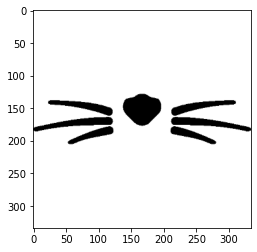

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [ ]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(334, 334, 3)
(334, 334, 3)
(x,y) : (114,229)


스티커부분이 흰색은 그대로, 검은색은 투명으로 나오는 문제 해결

- np.where 이해하기

[공식문서-numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

[numpy의 where 함수 사용법](https://pinkwink.kr/1236)

cv2.addWeighted함수로 스티커의 자연스럽게 붙이기(투명도 조절. 블렌딩)<br>
스티커이미지의 가중치는 0.6, 원본사진의 가중치는 0.4로 설정했다.

<br>

**cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None)** -> dst
- src1: (입력) 첫 번째 영상
- alpha: 첫 번째 영상 가중치
- src2: 두 번째 영상. src1과 같은 크기 & 같은 타입
- beta: 두 번째 영상 가중치
- gamma: 결과 영상에 추가적으로 더할 값
- dst: 가중치 합 결과 영상
- dtype: 출력 영상(dst)의 타입

[참고1](http://www.gisdeveloper.co.kr/?p=6407)
[참고2](https://deep-learning-study.tistory.com/115)

(334, 334, 3)


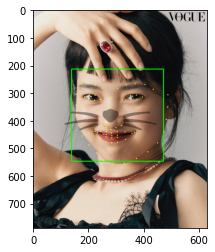

In [ ]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력

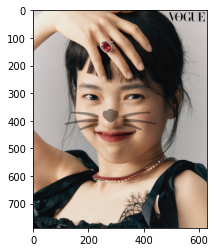

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지2) 측면사진

위의 과정을 측면사진에 대해 다시 진행해보고 결과를 확인한다.

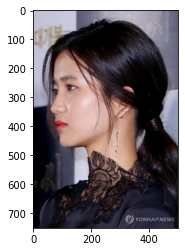

In [ ]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image3.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(-33, 199) (224, 430)]]


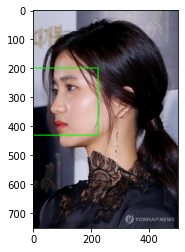

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표
left = 0

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    left = l

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(47, 289), (39, 310), (39, 333), (45, 358), (52, 382), (59, 409), (69, 436), (82, 459), (107, 468), (139, 469), (174, 458), (206, 440), (232, 416), (251, 388), (260, 354), (259, 321), (255, 287), (41, 242), (43, 229), (53, 224), (66, 226), (76, 236), (92, 234), (115, 224), (141, 222), (166, 230), (187, 243), (86, 272), (81, 294), (73, 315), (67, 337), (63, 348), (69, 355), (78, 359), (90, 356), (103, 352), (51, 273), (56, 265), (69, 266), (81, 276), (68, 278), (56, 278), (121, 275), (131, 264), (146, 264), (160, 273), (148, 277), (132, 277), (72, 393), (67, 382), (73, 377), (79, 380), (87, 378), (106, 386), (125, 398), (108, 409), (94, 413), (84, 413), (77, 410), (71, 402), (77, 392), (75, 390), (81, 391), (89, 391), (117, 397), (91, 397), (82, 397), (77, 394)]


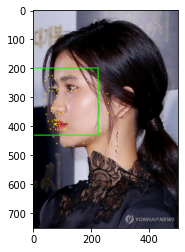

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (78,341)
(w,h) : (258,258)


(x,y) : (-51,212)


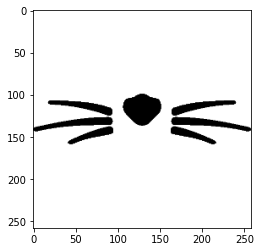

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

이 경우의 얼굴영역은 왼쪽을 조금 넘어가서 x좌표가 음수가 되므로<br>
왼쪽 스티커 이미지를 조금 자르고 x를 0으로 해준다.

In [ ]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(258, 206, 3)
(258, 206, 3)
(x,y) : (0,212)


(258, 206, 3)


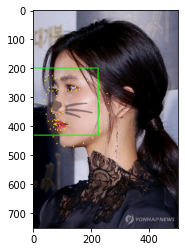

In [ ]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력

- 측면 사진에도 잘 동작한다.

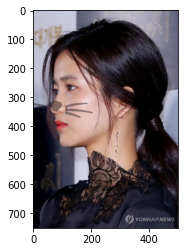

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지3) 밝기가 다른 정면 사진

위의 과정과 같다.

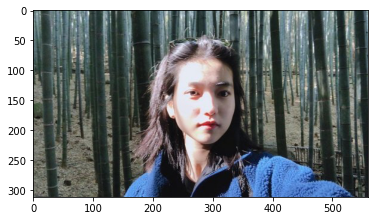

In [ ]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image5.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(231, 95) (342, 207)]]


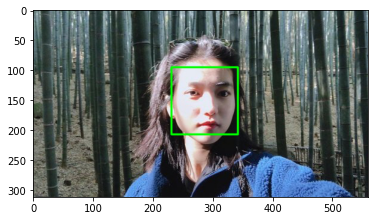

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(232, 139), (232, 153), (234, 168), (238, 182), (246, 194), (256, 205), (268, 214), (281, 222), (292, 224), (303, 222), (313, 213), (322, 203), (329, 192), (333, 178), (337, 165), (338, 152), (337, 140), (249, 125), (258, 121), (268, 120), (278, 122), (288, 126), (304, 127), (312, 123), (321, 121), (329, 122), (334, 127), (297, 139), (298, 148), (299, 157), (300, 166), (288, 174), (293, 176), (298, 177), (302, 176), (306, 174), (259, 138), (266, 135), (273, 136), (279, 141), (272, 142), (265, 142), (308, 142), (314, 136), (321, 136), (327, 140), (322, 143), (315, 143), (276, 193), (285, 188), (293, 185), (297, 186), (301, 185), (308, 188), (313, 193), (307, 197), (301, 199), (296, 200), (292, 199), (285, 197), (279, 192), (293, 191), (296, 192), (301, 191), (309, 193), (301, 191), (296, 192), (292, 192)]


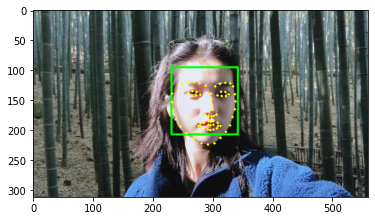

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (298,170)
(w,h) : (112,112)


(x,y) : (242,114)


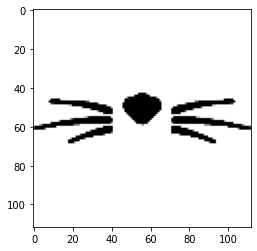

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [ ]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(112, 112, 3)
(112, 112, 3)
(x,y) : (242,114)


(112, 112, 3)


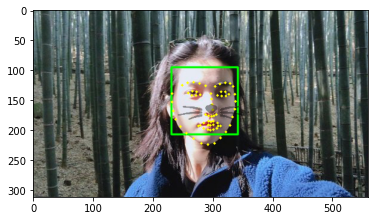

In [ ]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력
- 얼굴이 잘 인식되었으며 스티커추가도 잘 동작한다.

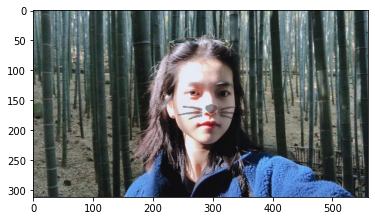

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지4) 전신 사진
얼굴이 작게 나오는 전신 사진에서도 잘 동작하는지 확인해보았다.

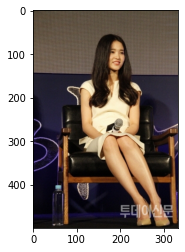

In [ ]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image8.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(164, 81) (218, 135)]]


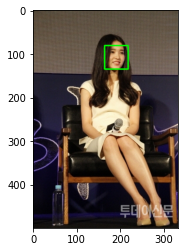

In [ ]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(167, 100), (166, 107), (166, 114), (168, 121), (171, 127), (175, 132), (180, 135), (186, 137), (192, 138), (197, 137), (201, 133), (204, 128), (207, 123), (209, 118), (210, 113), (211, 107), (210, 102), (175, 91), (179, 89), (183, 88), (187, 89), (190, 90), (199, 91), (202, 90), (205, 90), (208, 92), (209, 94), (194, 97), (195, 101), (195, 105), (196, 110), (189, 112), (192, 113), (194, 114), (196, 113), (198, 113), (178, 97), (181, 95), (184, 96), (186, 98), (184, 98), (181, 98), (199, 99), (202, 97), (205, 97), (206, 99), (205, 100), (202, 100), (182, 120), (187, 117), (191, 116), (194, 117), (197, 116), (199, 118), (200, 121), (198, 124), (196, 125), (193, 126), (190, 125), (186, 123), (183, 120), (191, 119), (194, 119), (196, 119), (199, 121), (196, 122), (193, 122), (190, 122)]


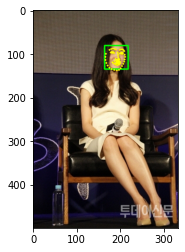

In [ ]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (194,112)
(w,h) : (55,55)


(x,y) : (167,85)


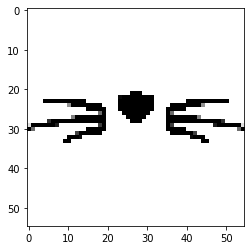

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [ ]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(55, 55, 3)
(55, 55, 3)
(x,y) : (167,85)


(55, 55, 3)


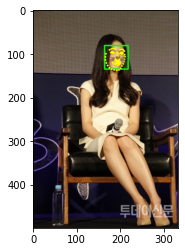

In [ ]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력

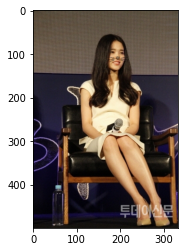

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

얼굴 영역이 작아서 확인이 어려우므로 cv2.resize함수로 크기를 확대해서 확인해보았다.<br>
잘 동작한다.

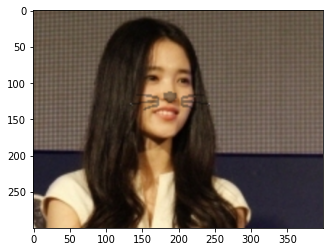

In [ ]:
height, width, ch = img_bgr.shape

dst2 = cv2.resize(img_bgr, (width*2, height*2))

plt.imshow(cv2.cvtColor(dst2[100:400, 200:600], cv2.COLOR_BGR2RGB))
plt.show()

## 이미지5) 측면 + 회전된 사진

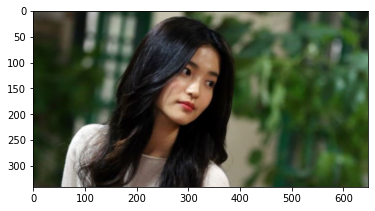

In [5]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image7.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(233, 85) (366, 219)]]


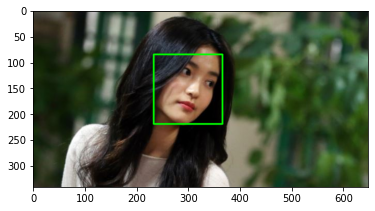

In [6]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(241, 108), (236, 125), (234, 144), (233, 162), (238, 178), (245, 192), (256, 203), (269, 213), (282, 219), (295, 220), (307, 215), (316, 208), (326, 199), (335, 189), (343, 178), (348, 166), (351, 153), (272, 98), (285, 94), (298, 96), (310, 100), (320, 109), (338, 118), (346, 118), (354, 121), (359, 126), (359, 134), (324, 130), (322, 140), (320, 149), (318, 159), (299, 162), (304, 166), (310, 170), (315, 170), (320, 170), (280, 118), (290, 117), (297, 119), (302, 125), (295, 124), (288, 122), (333, 138), (342, 137), (348, 140), (351, 145), (346, 145), (339, 142), (278, 177), (291, 175), (302, 176), (305, 179), (310, 180), (313, 186), (313, 194), (307, 195), (302, 195), (298, 193), (293, 191), (285, 185), (281, 178), (299, 182), (303, 185), (307, 186), (310, 192), (306, 187), (301, 185), (297, 183)]


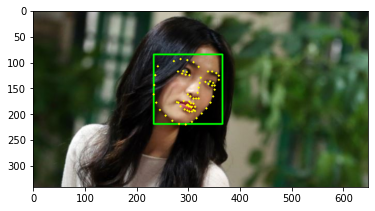

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (310,154)
(w,h) : (134,134)


(x,y) : (243,87)


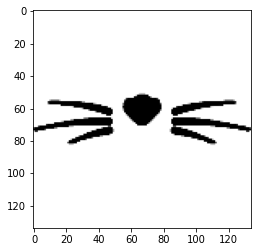

In [10]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [11]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(134, 134, 3)
(134, 134, 3)
(x,y) : (243,87)


(134, 134, 3)


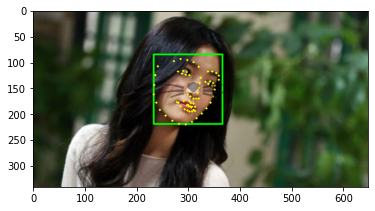

In [12]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력
- 스티커를 얼굴에 맞게 회전시키지 않고 붙여서 조금 어색하다.

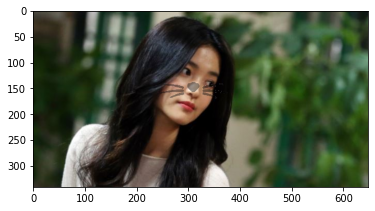

In [13]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지6) 여러명 있는 사진

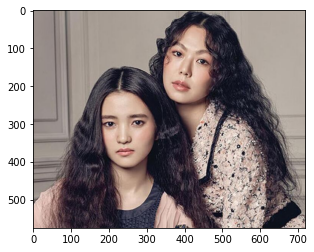

In [16]:
# opencv로 이미지 읽어오기
my_image_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/image9.jpg'
img_bgr = cv2.imread(my_image_path)

# 이미지 복사본 생성 (출력용)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # rgb로 변환 후 plt.imshow실행해야 함.
plt.imshow(img_rgb)
plt.show()

rectangles[[(173, 263) (307, 397)], [(315, 84) (476, 245)]]


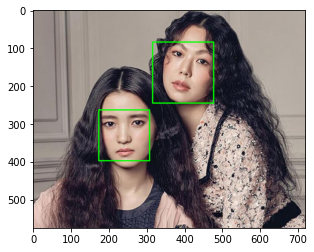

In [17]:
import dlib
detector_hog = dlib.get_frontal_face_detector()       # detector 선언
dlib_rects = detector_hog(img_rgb, 2)                 # (image, num of img pyramid)

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show위에 얼굴영역을 사각형으로 그리기

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

인식한 얼굴 영역 개수

In [22]:
n_faces = len(dlib_rects)
n_faces

2

In [30]:
# landmark모델을 불러옴
model_path = '/content/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    # RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # dlib.full_object_detection의 메소드를 통해 좌표를 받아 리스트로 변환
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))  
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(178, 303), (179, 322), (182, 340), (187, 358), (193, 376), (203, 391), (216, 404), (230, 413), (247, 415), (266, 413), (283, 402), (298, 389), (310, 373), (317, 354), (321, 334), (324, 314), (324, 293), (178, 288), (186, 280), (199, 278), (212, 279), (224, 283), (247, 282), (262, 276), (277, 274), (292, 276), (305, 283), (236, 299), (236, 314), (236, 328), (236, 342), (225, 350), (231, 352), (238, 354), (246, 352), (253, 349), (190, 302), (198, 297), (209, 297), (218, 304), (209, 306), (198, 306), (261, 302), (270, 294), (280, 294), (290, 297), (282, 303), (271, 303), (219, 375), (226, 369), (233, 365), (240, 367), (247, 364), (257, 366), (268, 372), (259, 380), (249, 384), (241, 385), (234, 385), (227, 382), (223, 375), (234, 373), (240, 373), (248, 372), (263, 372), (248, 373), (241, 374), (234, 374)]


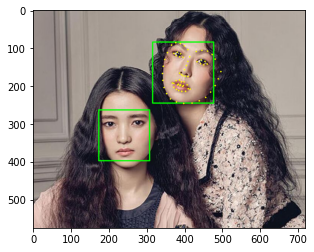

In [31]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)    # img_show에 landmark 68개를 노란색점으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [32]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0]

    y = landmark[33][1]
    y += landmark[2][1]
    y += landmark[36][1]
    y += landmark[59][1]
    y //= 4


    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(x,y) : (238,344)
(w,h) : (135,135)
(x,y) : (395,159)
(w,h) : (162,162)


(x,y) : (314,78)


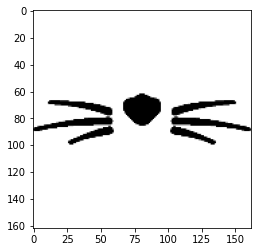

In [33]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)

refined_x = x - w//2  # left
refined_y = y - h//2  # top

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))    # 사진 위 스티커의 left-top 좌표

In [34]:
print(img_sticker.shape)   # 자르기 전 스티커 shape

# y좌표가 음수일 때, 스티커 위쪽을 y만큼 자른다. y는 0으로 설정.
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]   # 행 제거
    refined_y = 0
# x좌표가 음수일 때, 스티커 왼쪽을 x만큼 자른다. x는 0으로 설정.
if refined_x < 0:
    img_sticker = np.delete(img_sticker, list(range(0, -refined_x+1)), axis=1)    # 열 제거
    refined_x = 0

print (img_sticker.shape)  # 자르기 후 스티커 shape
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(162, 162, 3)
(162, 162, 3)
(x,y) : (314,78)


(162, 162, 3)


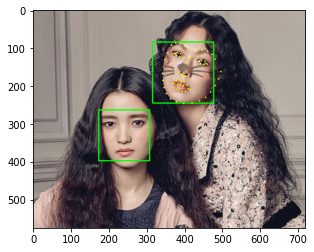

In [35]:
# img_show는 원본 사진의 복사본이다.
# sticker_area는 사진의 일부이다. 스티커를 추가할 즉, 얼굴이 있는 범위에 해당한다.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

결과 이미지 출력
- 스티커를 얼굴에 맞게 회전시키지 않고 붙여서 조금 어색하다.
- 얼굴 인식은 2개가 되었는데 이전코드로는 landmark가 하나의 얼굴영역에만 적용된다.

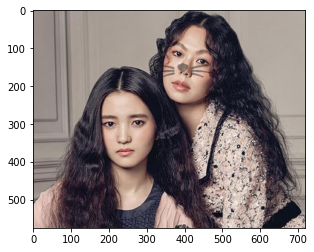

In [36]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = cv2.addWeighted(sticker_area, 0.6, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.4, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회고)

x좌표가 음수 일 때 이미지 데이터의 열 데이터를 제거하기 위해 어떤 방법을 사용하면 좋을까 많은 고민끝에 **np.delete()**과 **axis=1**의 옵션을 통해 구현할 수 있었다.<br>
스티커를 원본 사진에 적용시킬 때 **np.where**를 통해 조건에 만족하면(True) 스티커영역, 만족하지 않으면(False) 스티커의 색상값을 적용시키는 방법이 흥미로웠다.<br>
그리고 **스티커의 투명도를 조절**하는 동작을 언제 수행할까에 대해 고민을 했는데 np.where로 스티커를 적용하고 난 결과를 **cv2.addWeighted**의 입력으로 넣으면 쉽게 구현할 수 있다는 걸 알게 됐다. 해당 코드에서는 원본 사진을 0.6, 스티커를 0.4로 지정해 블렌딩하였다.

<br>

이번 미니 프로젝트에서는 헷갈리는 부분이 많았다.
- 각 x,y좌표가 이미지 위에 정확히 어디에 위치하는지
- 스티커 좌표의 x좌표
 - x좌표를 코끝의 좌표로 지정했는데 코끝의 좌표에서 얼굴영역 크기/2만큼 왼쪽으로 이동시켜서 스티커가 원하는 곳에 위치한게 맞는가?


<br><br>

## 개선하고 싶은 부분)

**1. 스티커를 얼굴에 맞게 회전하려면 어떻게 해야할까?**
- 코의 시작과 끝의 좌표를 통해 얼굴의 기울기를 구한다.
 - landmark 27번과 33번 좌표
- **cv2.getRotationMatrix2D**함수를 사용하여 스티커이미지를 회전시킨다.
 - 기울기를 통해 회전각을 어떻게 구할까?

 > 회전각=$\theta$, 기울기=$a$라고 하면 $tan(90-\theta)=a$임을 이용해 회전각을 구한다. $\theta$를 구할 땐 math.atan()함수를 사용한다. **(단, 반환값이 -pi/2부터 pi/2사이의 float 값임을 주의!!)**

- **cv2.wrapAffine**함수를 사용하여 변환을 적용시킨다.

[참고: cv2.getRotaionMatrix2D()](https://076923.github.io/posts/Python-opencv-6/)

[참고: math.atan()](https://issac-min.tistory.com/76)

<br>

**2. 스티커를 여러 명의 얼굴에 적용하고 싶다.**
